# EDA of Pizza Sales

This pizza sales dataset make up 12 relevant features:

● order_id: Unique identifier for each order placed by a table

● order_details_id: Unique identifier for each pizza placed within each order (pizzas of the
same type and size are kept in the same row, and the quantity increases)
● pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price
● quantity: Quantity ordered for each pizza of the same type and size
● order_date: Date the order was placed (entered into the system prior to cooking & serving)
● order_time: Time the order was placed (entered into the system prior to cooking & serving)
● unit_price: Price of the pizza in USD
● total_price: unit_price * quantity
● pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)
● pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price
● pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include
Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce
is specified)
● pizza_name: Name of the pizza as shown in the menu

## Important Libraries


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')
%matplotlib inline
plt.style.available[:5]
from wordcloud import WordCloud, STOPWORDS


Reading csv file and storing it in 'data' variable

In [2]:
data= pd.read_csv('Data Model - Pizza Sales.xlsx - pizza_sales.csv')
data.head(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


##Some Information about **dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [4]:
data.shape

(48620, 12)

In [5]:
data.isnull().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [6]:
data.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [7]:
data['order_time']=data['order_time'].astype('string')
data[['Hour','Minute', 'Second']]= data['order_time'].str.split(":",expand=True)
data["Hour"].value_counts()

,count
Hour,
12,6543
13,6203
18,5359
17,5143
19,4350
16,4185
14,3521
20,3487
15,3170


In [8]:
data.head(3)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Hour,Minute,Second
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,38,36
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,57,40
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11,57,40


In [9]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [10]:
data['order_time']=pd.to_datetime(data['order_time'],format='%H:%M:%S')

In [11]:
data['calculated_total'] = data['unit_price'] * data['quantity']

discrepancy = data[data['calculated_total'] != data['total_price']]

print(f"Discrepancies in total price calculation: {len(discrepancy)}")

Discrepancies in total price calculation: 0


In [12]:
data.describe()

,order_details_id,order_id,quantity,order_date,order_time,unit_price,total_price,calculated_total
count,48620.000000,48620.000000,48620.000000,48620,48620,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,1900-01-01 16:24:51.322151424,16.494132,16.821474,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,1900-01-01 09:52:21,9.750000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,1900-01-01 13:24:46,12.750000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,1900-01-01 16:33:33,16.500000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,1900-01-01 18:55:19,20.250000,20.500000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,1900-01-01 23:05:52,35.950000,83.000000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,NaN,3.621789,4.437398,4.437398


##Data Visualization

<ipython-input-13-b1d4715b6fc7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x='Hour',palette="flare",)


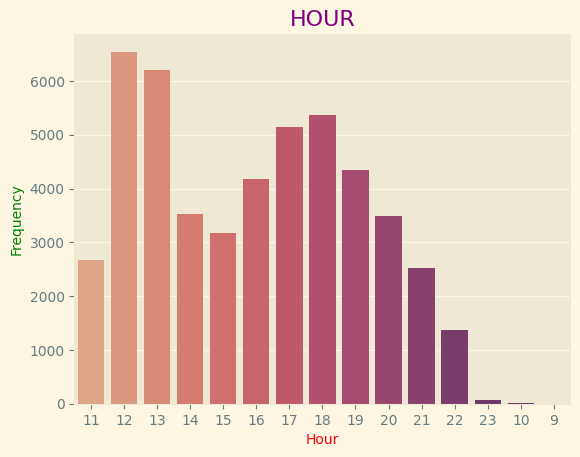

In [13]:
sns.countplot(data = data, x='Hour',palette="flare",)
plt.xlabel("Hour",fontsize=10,color="r")
plt.ylabel("Frequency",fontsize=10,color="g")
plt.title("HOUR",color="purple")

plt.show()

In [14]:
data['order_year']= pd.DatetimeIndex(data['order_date']).year
data['order_year'].value_counts()

,count
order_year,
2015,48620


In [15]:
data['order_dates']= data['order_date'].dt.day_name()
data['order_dates'].value_counts()

,count
order_dates,
Friday,8106
Saturday,7355
Thursday,7323
Wednesday,6797
Tuesday,6753
Monday,6369
Sunday,5917


<ipython-input-16-63141675c53e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x ='order_dates',palette="rocket")


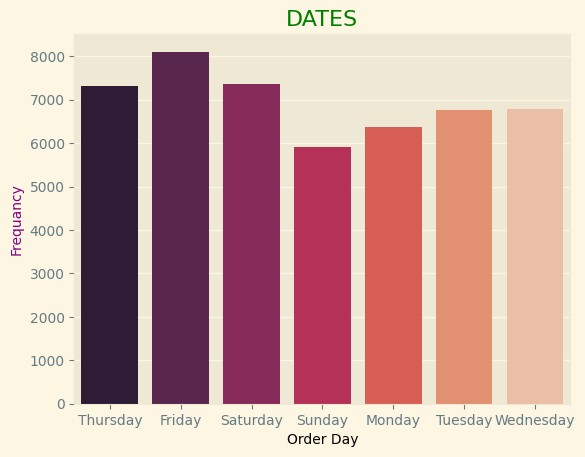

In [16]:
sns.countplot(data=data, x ='order_dates',palette="rocket")
plt.xlabel('Order Day', fontsize = 10, color='black')
plt.ylabel('Frequancy', fontsize = 10, color='purple')
plt.title("DATES",color="green")

plt.show()

In [17]:
data['order_month'] =pd.DatetimeIndex (data['order_date']).month
data.loc[(data['order_month'] ==1), 'order_month'] = 'January'
data.loc[(data['order_month'] ==2), 'order_month'] = 'February'
data.loc[(data['order_month'] ==3), 'order_month'] = 'March'
data.loc[(data['order_month'] ==4), 'order_month'] = 'April'
data.loc[(data['order_month'] ==5), 'order_month'] = 'May'
data.loc[(data['order_month'] ==6), 'order_month'] = 'June'
data.loc[(data['order_month'] ==7), 'order_month'] = 'July'
data.loc[(data['order_month'] ==8), 'order_month'] = 'August'
data.loc[(data['order_month'] ==9), 'order_month'] = 'September'
data.loc[(data['order_month'] ==10), 'order_month'] = 'October'
data.loc[(data['order_month'] ==11), 'order_month'] = 'November'
data.loc[(data['order_month'] ==12), 'order_month'] = 'December'
data['order_month'].value_counts()

<ipython-input-17-1602eb9b5874>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'January' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.loc[(data['order_month'] ==1), 'order_month'] = 'January'


,count
order_month,
July,4301
May,4239
March,4186
November,4185
January,4156
August,4094
April,4067
June,4025
February,3892


<ipython-input-18-fa8783dc0bbd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="order_month",palette="pastel")


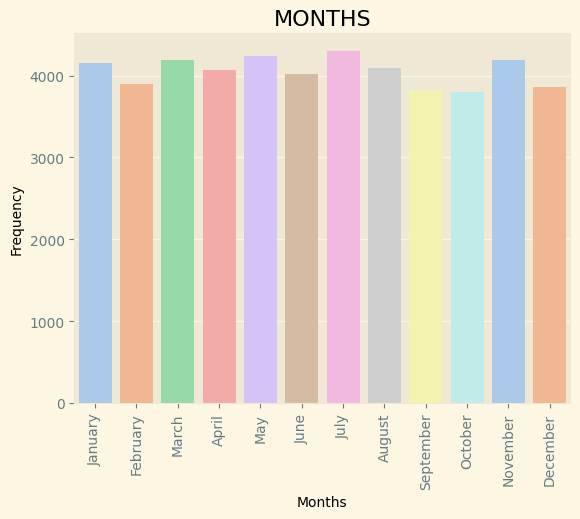

In [18]:
sns.countplot(data=data,x="order_month",palette="pastel")
plt.xticks(rotation=90)
plt.xlabel("Months",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("MONTHS",color="black")
plt.show()

In [19]:
data['pizza_id'].value_counts()

,count
pizza_id,
big_meat_s,1811
thai_ckn_l,1365
five_cheese_l,1359
four_cheese_l,1273
classic_dlx_m,1159
...,...
mexicana_s,160
calabrese_s,99
ckn_alfredo_s,96


In [20]:
data['quantity'].value_counts()

,count
quantity,
1,47693
2,903
3,21
4,3


<ipython-input-21-725311252c1b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="quantity",palette="Set1")


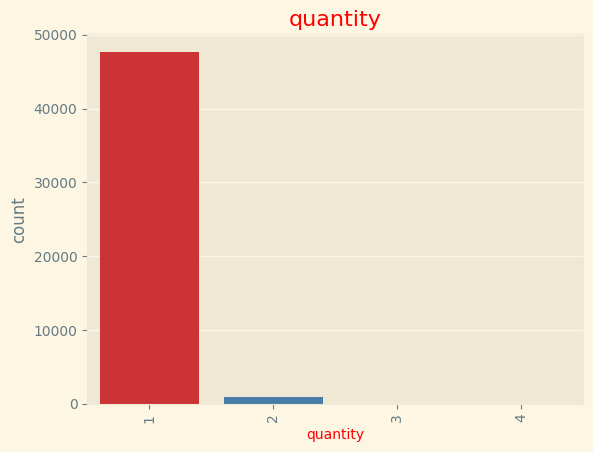

In [21]:
sns.countplot(data=data,x="quantity",palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("quantity",fontsize=10,color="red")
plt.title("quantity",color="red")
plt.show()

In [22]:
data['pizza_size'].value_counts()

,count
pizza_size,
L,18526
M,15385
S,14137
XL,544
XXL,28


<ipython-input-23-cb1f34a360eb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="pizza_size",palette="Set1",hue=None, legend=False)


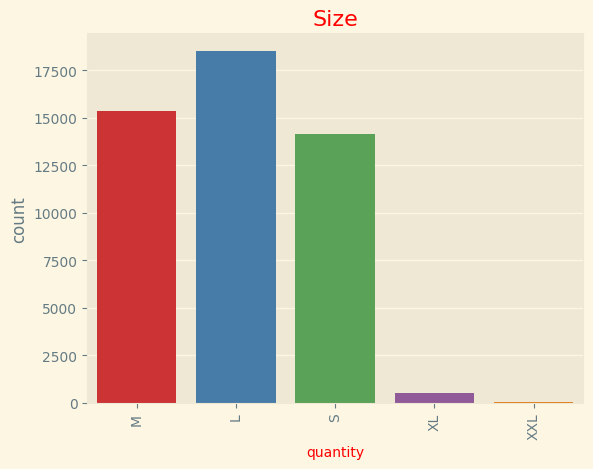

In [23]:
sns.countplot(data=data,x="pizza_size",palette="Set1",hue=None, legend=False)
plt.xticks(rotation=90)
plt.xlabel("quantity",fontsize=10,color="red")
plt.title("Size",color="red")
plt.show()

In [24]:
data['pizza_category'].value_counts()

,count
pizza_category,
Classic,14579
Supreme,11777
Veggie,11449
Chicken,10815


<ipython-input-25-2518906fbce9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='pizza_category',palette="BuGn_r")


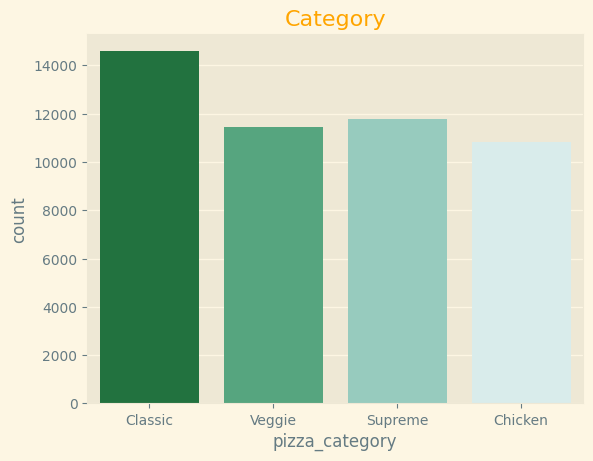

In [25]:
sns.countplot(data=data, x='pizza_category',palette="BuGn_r")
plt.title('Category', color='Orange')
plt.show()

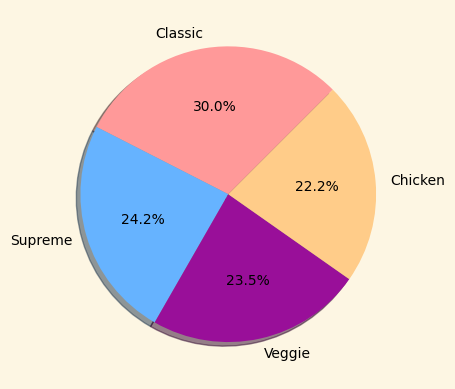

In [26]:
labels = data["pizza_category"].value_counts().index
sizes = data["pizza_category"].value_counts()
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.show()

In [27]:
data.head(2)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Hour,Minute,Second,calculated_total,order_year,order_dates,order_month
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,38,36,13.25,2015,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,57,40,16.00,2015,Thursday,January


In [28]:
data['pizza_ingredients'].value_counts()

,count
pizza_ingredients,
"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon",2416
"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",2372
"Sliced Ham, Pineapple, Mozzarella Cheese",2370
"Mozzarella Cheese, Pepperoni",2369
"Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce",2315
"Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",2302
"Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic",1887
"Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic",1887
"Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce",1885


In [29]:
data['pizza_name'].value_counts()

,count
pizza_name,
The Classic Deluxe Pizza,2416
The Barbecue Chicken Pizza,2372
The Hawaiian Pizza,2370
The Pepperoni Pizza,2369
The Thai Chicken Pizza,2315
The California Chicken Pizza,2302
The Sicilian Pizza,1887
The Spicy Italian Pizza,1887
The Southwest Chicken Pizza,1885


<ipython-input-30-8eef9ac4f9d3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='order_dates', y='count', palette='Set1')


Text(0.5, 1.0, 'Day with highest Order')

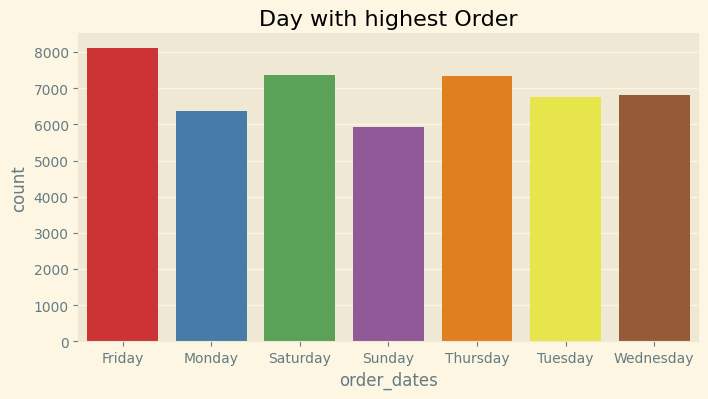

In [30]:
plt.figure(figsize=(8,4))
# Group data by day and count occurrences
df_grouped = data.groupby('order_dates')['order_dates'].count().reset_index(name='count')

# Create the bar chart
sns.barplot(data=df_grouped, x='order_dates', y='count', palette='Set1')
plt.title('Day with highest Order')


In [31]:
px.box(data,x='pizza_name',y='total_price',
       color='pizza_name',template='seaborn',
       labels={'pizza_name':'Name','total_price':'Price'},
       title='<b>Pizza Names and Prices')


In [32]:
fig=px.pie(data.groupby('pizza_size',as_index=False)['total_price'].count().sort_values(by='total_price',ascending=False),
          names='pizza_size',
          values='total_price',
          color='pizza_size',
          hole=0.7,
          labels={'pizza_size':'pizza_size','total_price':'price'},
          template='plotly',title='<b>  Pizza Sizes')

fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1,))
fig.update_layout(
    width=600,  # Adjust width as needed
    height=400  # Adjust height as needed
)

In [33]:
z=data['pizza_category'].value_counts()
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},
           template='ggplot2',
           title='<b>Total Money Earned From Pizza Categories</b> ')
fig.update_layout(
    width=700,  # Adjust width as needed
    height=500  # Adjust height as needed
)
fig.show()

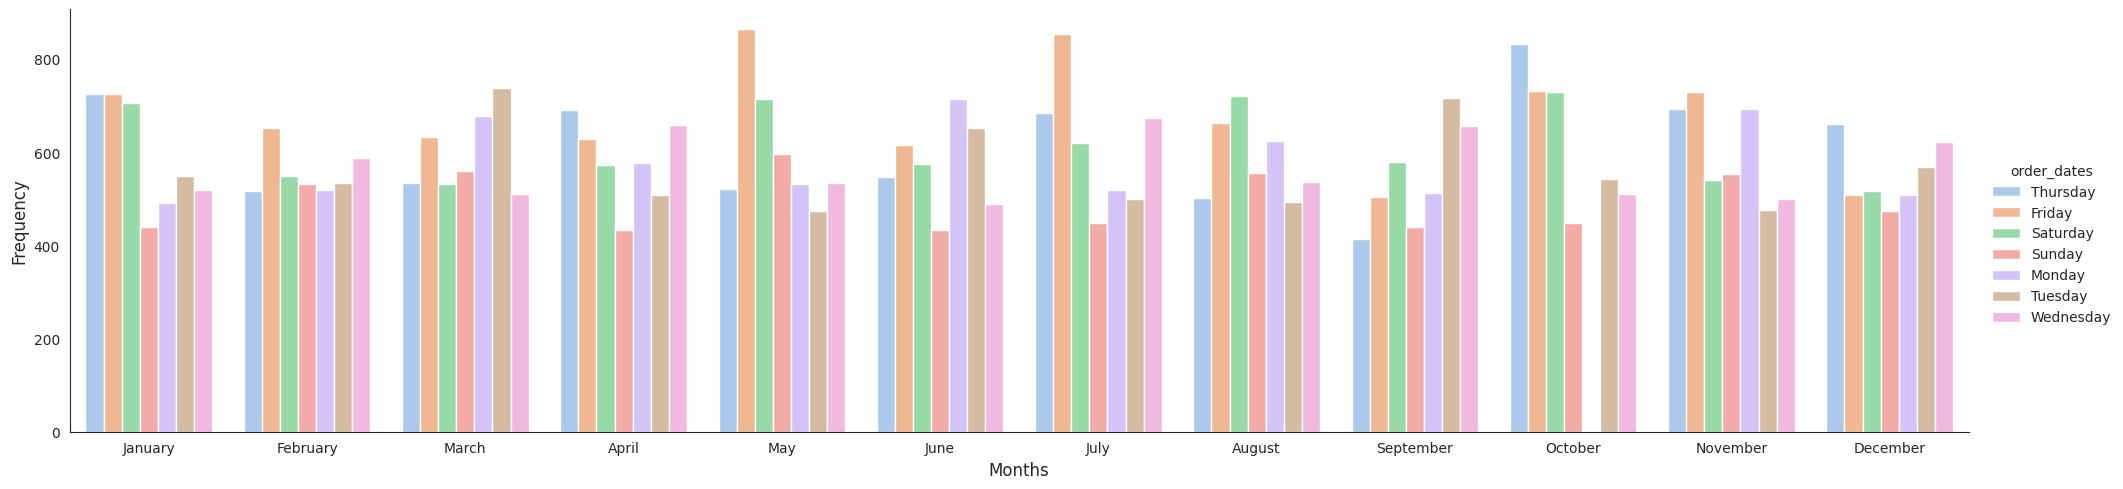

In [34]:
with sns.axes_style('white'):
    g = sns.catplot(x="order_month", data=data, aspect=4.0, kind='count',hue='order_dates',palette="pastel")
g.set_ylabels('Frequency')
g.set_xlabels("Months")
plt.show()

In [37]:
joint_data=data.sort_values(by='total_price', ascending=False)

top_rated=joint_data[:]
fig =px.sunburst(
    top_rated,
    path=['pizza_category',"pizza_size"],
    values='total_price',
    color='total_price')
fig.update_layout(
    width=700,  # Adjust width as needed
    height=500  # Adjust height as needed
)
fig.show()

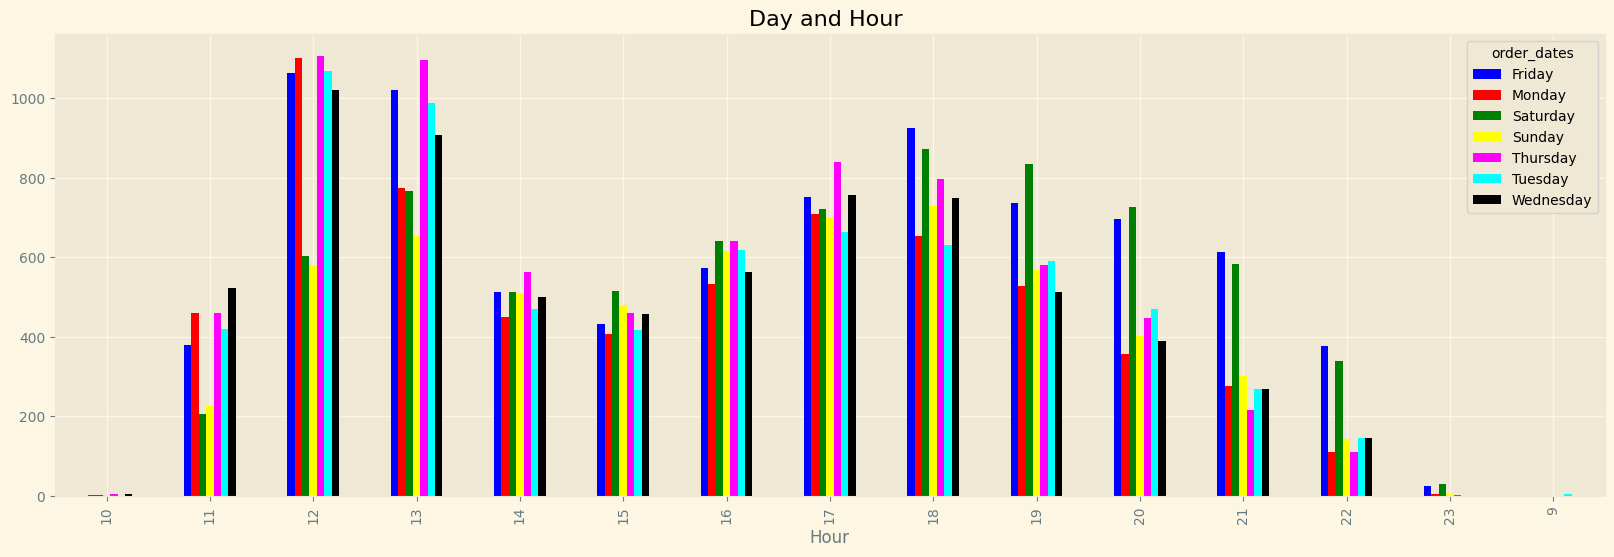

In [39]:
pd.crosstab(data["Hour"], data["order_dates"]).plot(kind="bar", figsize=(20, 6),
                                                color=["blue","red","green","yellow","magenta","cyan","black","orange"],
                                                title="Day and Hour ")
plt.show()

In [41]:
df1 = data.groupby(["pizza_size","pizza_category"],as_index=False)[['total_price']].median().rename(columns={'total_price':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "pizza_size","pizza_category"],
                 values   ='price', color='pizza_size',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

highest_price_group = df1.nlargest(1, 'price')  # Get the group with the highest median price
most_profitable_size = highest_price_group['pizza_size'].values[0]  # Extract the size from the group

if most_profitable_size == 'L':
    print("L size pizza has the largest rectangle, which is most profitable based on median price.")
else:
    print(f"{most_profitable_size} size pizza has the largest rectangle, which is most profitable based on median price.")

XXL size pizza has the largest rectangle, which is most profitable based on median price.


## Result
* Peak Hours: The restaurant is busiest during lunch and dinner time.
* Order Year: All orders analyzed were placed in 2015.
* Popular Day: Fridays see the highest number of orders.
* Top Seller: "Big meat s" is the most frequently ordered item.
* Group Orders: When customers order just one item, it's often a large order
  (likely for multiple people).
* Order Size: Most orders are for large-sized pizzas.
* Classic Choice: Classic pizzas are the most popular choice.
* Weekend Rush: Order volumes increase on Fridays and Saturdays.
* Common Toppings: Tomatoes, red peppers, and red onions are ubiquitous
  ingredients.
* Morning Slowdown: Despite opening at 9 AM, there's minimal activity during  
  the early morning hours.